In [1]:
!pip install retina-face tf-keras deepface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.8/160.8 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 4.9 MB/s eta 0:00:00


In [11]:
from retinaface import RetinaFace
import matplotlib.pyplot as plt
from deepface import DeepFace
import numpy as np
import cv2

26-01-16 08:51:11 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:00<00:00, 287MB/s] 


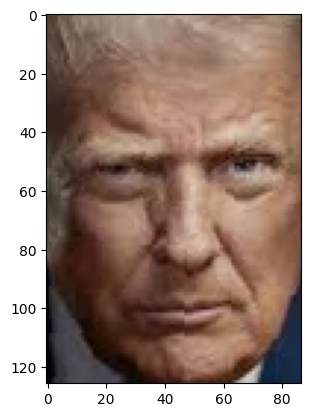

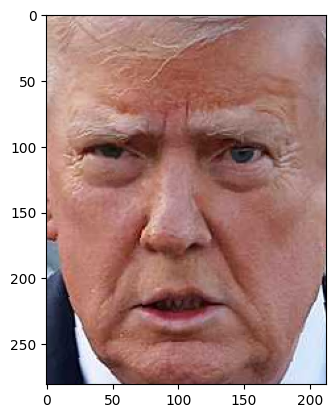

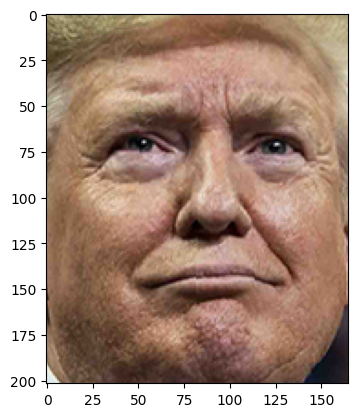

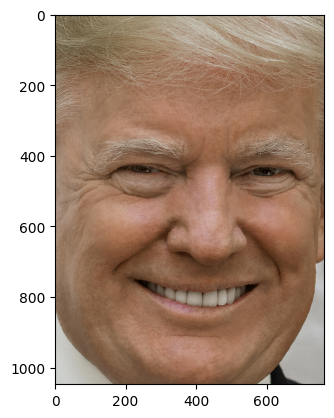

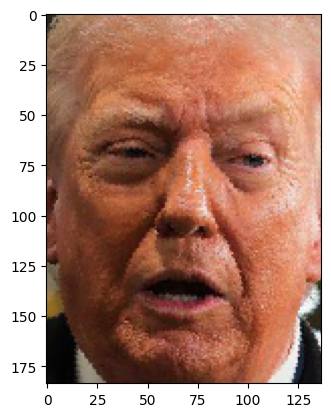

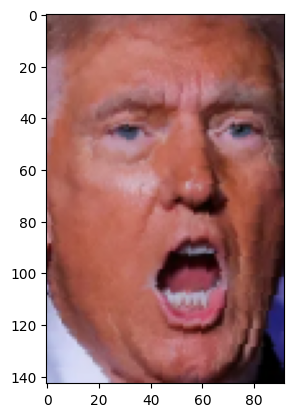

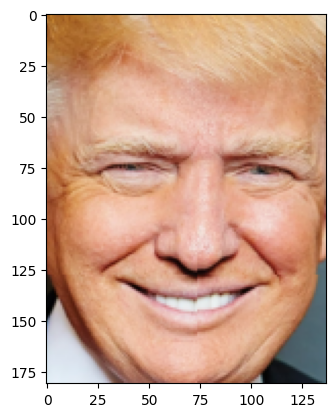

In [4]:
faces = []
for i in range(1,5):
    faces.extend(RetinaFace.extract_faces(img_path = f"/content/images{i}.jpg", align = True))
for i in range(5,8):
    faces.extend(RetinaFace.extract_faces(img_path = f"/content/images{i}.png", align = True))
for face in faces:
  plt.imshow(face)
  plt.show()

In [30]:
embeddings = []

for face in faces:
    rep = DeepFace.represent(
        img_path=face,
        model_name="ArcFace",
        detector_backend = "skip",
        enforce_detection=False
    )
    embeddings.append(rep[0]["embedding"])

embeddings = np.asarray(embeddings)


In [31]:
from sklearn.metrics.pairwise import cosine_similarity

sim_matrix = cosine_similarity(embeddings)
N = sim_matrix.shape[0]

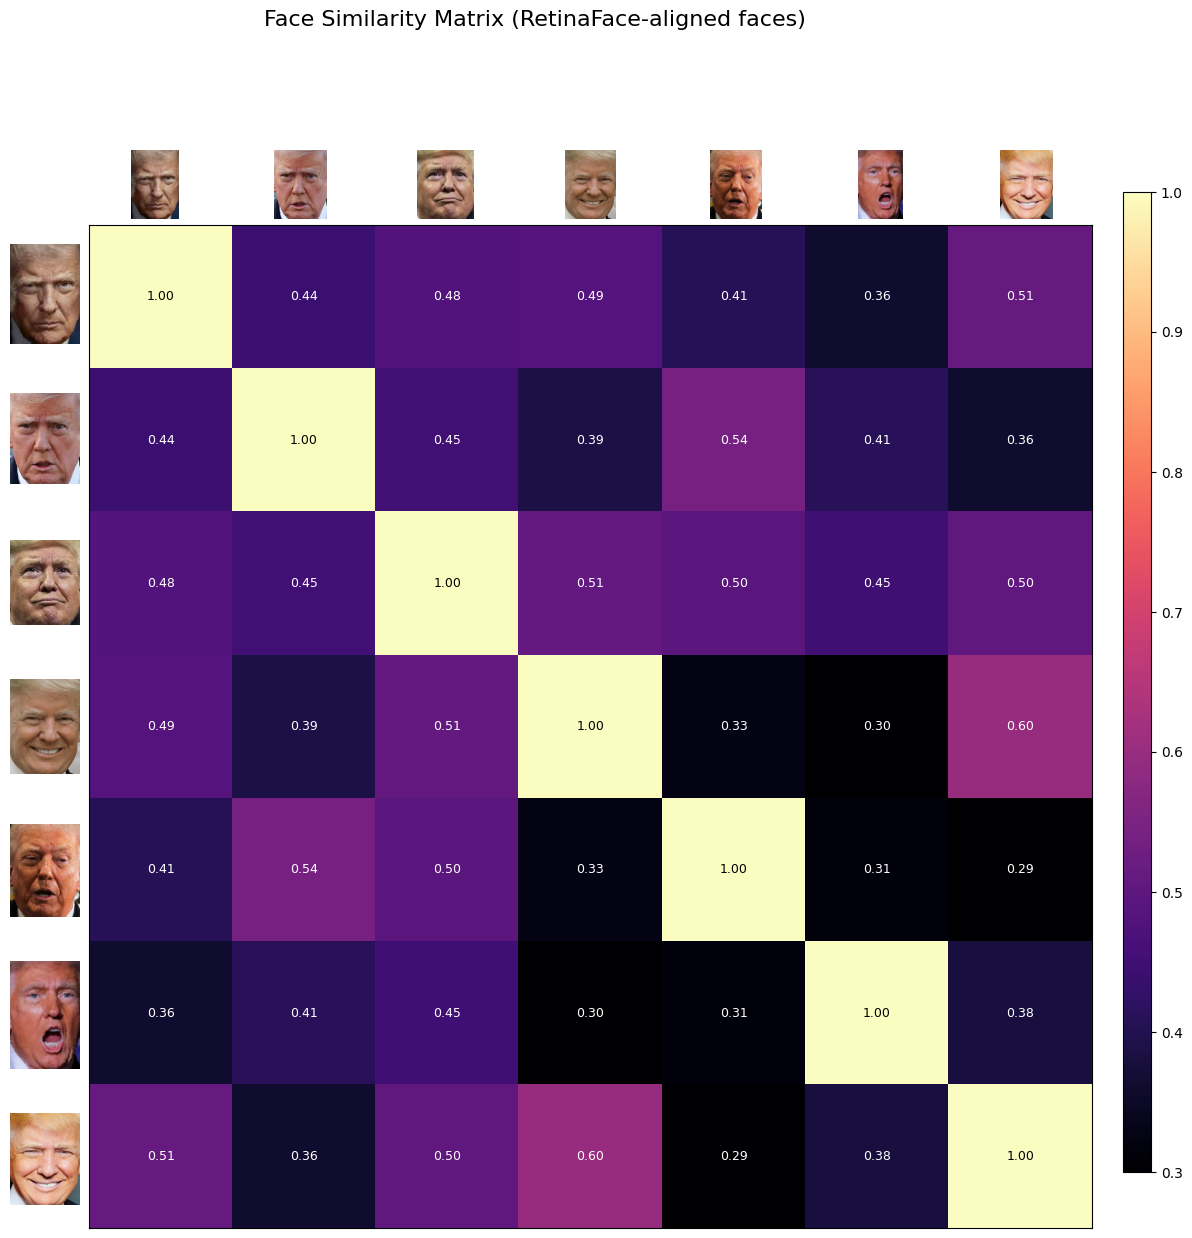

In [33]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(14, 14))

gs = GridSpec(
    nrows=N + 1,
    ncols=N + 1,
    width_ratios=[2.5] + [5]*N,
    height_ratios=[2.5] + [5]*N,
    wspace=0.05,
    hspace=0.05
)

# top-left empty
ax0 = fig.add_subplot(gs[0, 0])
ax0.axis("off")

# column labels (faces)
for j in range(N):
    ax = fig.add_subplot(gs[0, j + 1])
    ax.imshow(faces[j])
    ax.axis("off")

# row labels (faces)
for i in range(N):
    ax = fig.add_subplot(gs[i + 1, 0])
    ax.imshow(faces[i])
    ax.axis("off")

# similarity matrix
ax_mat = fig.add_subplot(gs[1:, 1:])
im = ax_mat.imshow(
    sim_matrix,
    cmap="magma",
    vmin=0.3,
    vmax=1.0
)

ax_mat.set_xticks([])
ax_mat.set_yticks([])

# draw similarity values
for i in range(N):
    for j in range(N):
        ax_mat.text(
            j, i,
            f"{sim_matrix[i, j]:.2f}",
            ha="center",
            va="center",
            color="white" if sim_matrix[i, j] < 0.7 else "black",
            fontsize=9
        )

# colorbar
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
plt.colorbar(im, cax=cax)

fig.suptitle("Face Similarity Matrix (RetinaFace-aligned faces)", fontsize=16)
plt.show()
